## 영상입력 이진분류 다중퍼셉트론

In [11]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

width = 28
height = 28

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(f'x_train[0] : {x_train[0]}')
# 한차원 낮추고, normalization
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

print(f'x_train[0] : {x_train[0]}')
print(f'y_train[0:10] : {y_train[0:10]}')

# 데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환
y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2
print(f'y_train[0:10] : {y_train[0:10]}')

(60000, 28, 28)
x_train[0] : [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 2

Using TensorFlow backend.


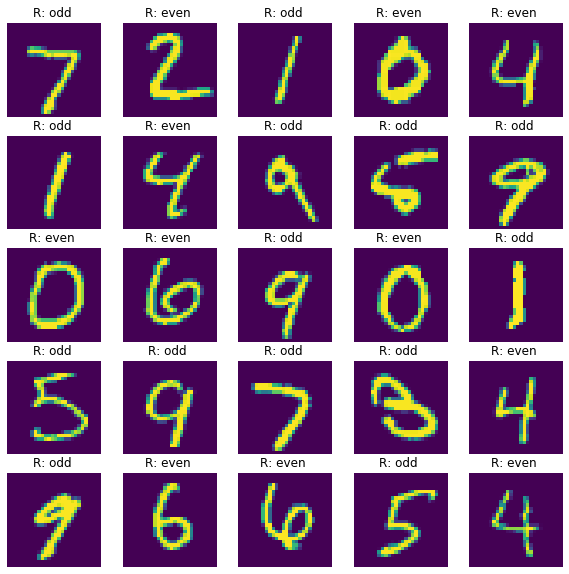

In [1]:
# 
%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '
    
    sub_plt.set_title(sub_plt_title)

plt.show()

In [2]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 3. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 62us/step - loss: 0.2874 - accuracy: 0.8849 - val_loss: 0.1476 - val_accuracy: 0.9492
Epoch 2/30
50000/50000 [==============================] - 3s 62us/step - loss: 0.1218 - accuracy: 0.9571 - val_loss: 0.0938 - val_accuracy: 0.9702
Epoch 3/30
50000/50000 [==============================] - 3s 60us/step - loss: 0.0852 - accuracy: 0.9698 - val_loss: 0.0767 - val_accuracy: 0.9734
Epoch 4/30
50000/50000 [==============================] - 3s 58us/step - loss: 0.0682 - accuracy: 0.9758 - val_loss: 0.0725 - val_accuracy: 0.9762
Epoch 5/30
50000/50000 [==============================] - 3s 61us/step - loss: 0.0570 - accuracy: 0.9800 - val_loss: 0.0656 - val_accuracy: 0.9773
Epoch 6/30
50000/50000 [==============================] - 3s 61us/step - loss: 0.0489 - accuracy: 0.9831 - val_loss: 0.0734 - val_accuracy: 0.9752
Epoch 7/30
50000/50000 [==============================] - 3s 60us/st

In [ ]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

10000/10000 [==============================] - 0s 27us/step
## evaluation loss and_metrics ##
[0.0596326826831124, 0.9850000143051147]


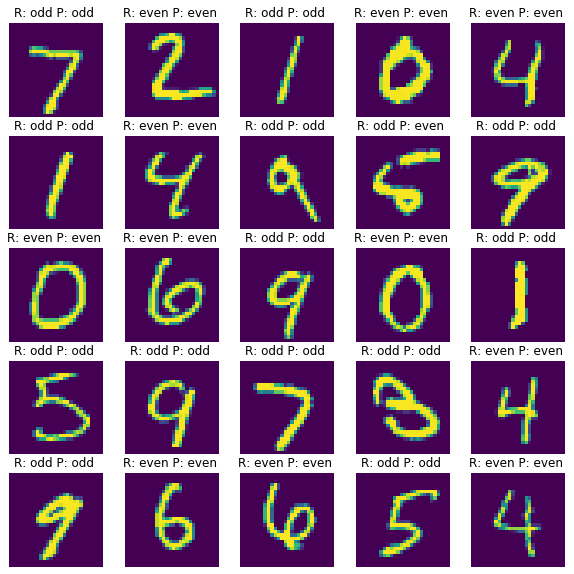

In [4]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '

    sub_plt_title += 'P: '
    
    if yhat_test[i] >= 0.5 :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '        
    
    sub_plt.set_title(sub_plt_title)

plt.show()